In [1]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Keras models are trained with 224, 224 images
IMAGE_SIZE = [224, 224]

In [3]:
train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [4]:
# Creating VGG16 object without fully connected layouts
vgg = VGG16(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

In [5]:
# Marking vgg16 layers non trainable
for layer in vgg.layers:
    layer.trainable = False

In [6]:
folders = glob('Dataset/Train/*')

In [7]:
# Flattening the vgg16 last layer output 
X = Flatten()(vgg.output)

In [8]:
# Defining fully connected layer
prediction = Dense(len(folders), activation='softmax')(X)

In [9]:
# Creating Model
model = Model(inputs=vgg.inputs, outputs=prediction)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# defining datagenerator rules
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# generating training and test dataset
training_set = train_datagen.flow_from_directory('Dataset/Train', target_size=(224, 224), 
                                                 batch_size=32, class_mode='categorical')

test_set = test_datagen.flow_from_directory('Dataset/Test', target_size=(224, 224), 
                                                 batch_size=32, class_mode='categorical')

Found 78 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [13]:
# Model Training
history = model.fit_generator(training_set, validation_data=test_set, epochs=10, steps_per_epoch=len(training_set),
                             validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
3/3 [==============================] - 11s 4s/step - loss: 1.0836 - accuracy: 0.6282 - val_loss: 1.0473 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 10s 3s/step - loss: 0.5812 - accuracy: 0.6667 - val_loss: 0.6587 - val_accuracy: 0.6500
Epoch 3/10
3/3 [==============================] - 10s 3s/step - loss: 0.4601 - accuracy: 0.7436 - val_loss: 0.3222 - val_accuracy: 0.8500
Epoch 4/10
3/3 [==============================] - 13s 4s/step - loss: 0.4328 - accuracy: 0.8333 - val_loss: 0.3167 - val_accuracy: 0.8500
Epoch 5/10
3/3 [==============================] - 10s 3s/step - loss: 0.1526 - accuracy: 0.9487 - val_loss: 0.1841 - val_accuracy: 0.9000
Epoch 6/10
3/3 [==============================] - 10s 3s/step - loss: 0.2244 - accuracy: 0.8718 - val_loss: 0.1383 - val_accuracy: 0.9000
Epoch 7/10
3/3 [==============================] - 13s 4s/step - loss: 0.0775 - accuracy: 0.9744 

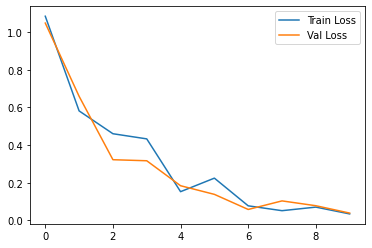

<Figure size 432x288 with 0 Axes>

In [14]:
# Creating Loss Plots
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

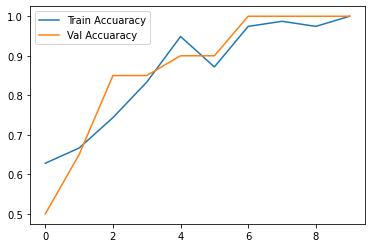

<Figure size 432x288 with 0 Axes>

In [16]:
# Creating Accuracy Plots
plt.plot(history.history['accuracy'], label='Train Accuaracy')
plt.plot(history.history['val_accuracy'], label='Val Accuaracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
model.save('transfer_learning_model.h5')